In [91]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import Adam_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300
m1 = np.array([3, 0])
m2 = np.array([-3, 0])
Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[1, 0], [0, 1]])

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = MixNormalRV([0.5, 0.5], [m1, m2], [Sigma1, Sigma2])

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 100
Niter = int(1e4)
alpha_Adam = 1e-2
nexperiments = 100
results_array_Adam = []
distribution_array_Adam = []
for _ in range(nexperiments):
    r_Adam, d_Adam = Adam_OAIS(phi, pi, q, N, Niter, alpha=alpha_Adam)
    results_array_Adam.append(r_Adam)
    distribution_array_Adam.append(d_Adam)


  1%|          | 55/10000 [00:00<00:32, 304.71it/s]

100%|██████████| 10000/10000 [00:16<00:00, 618.85it/s]


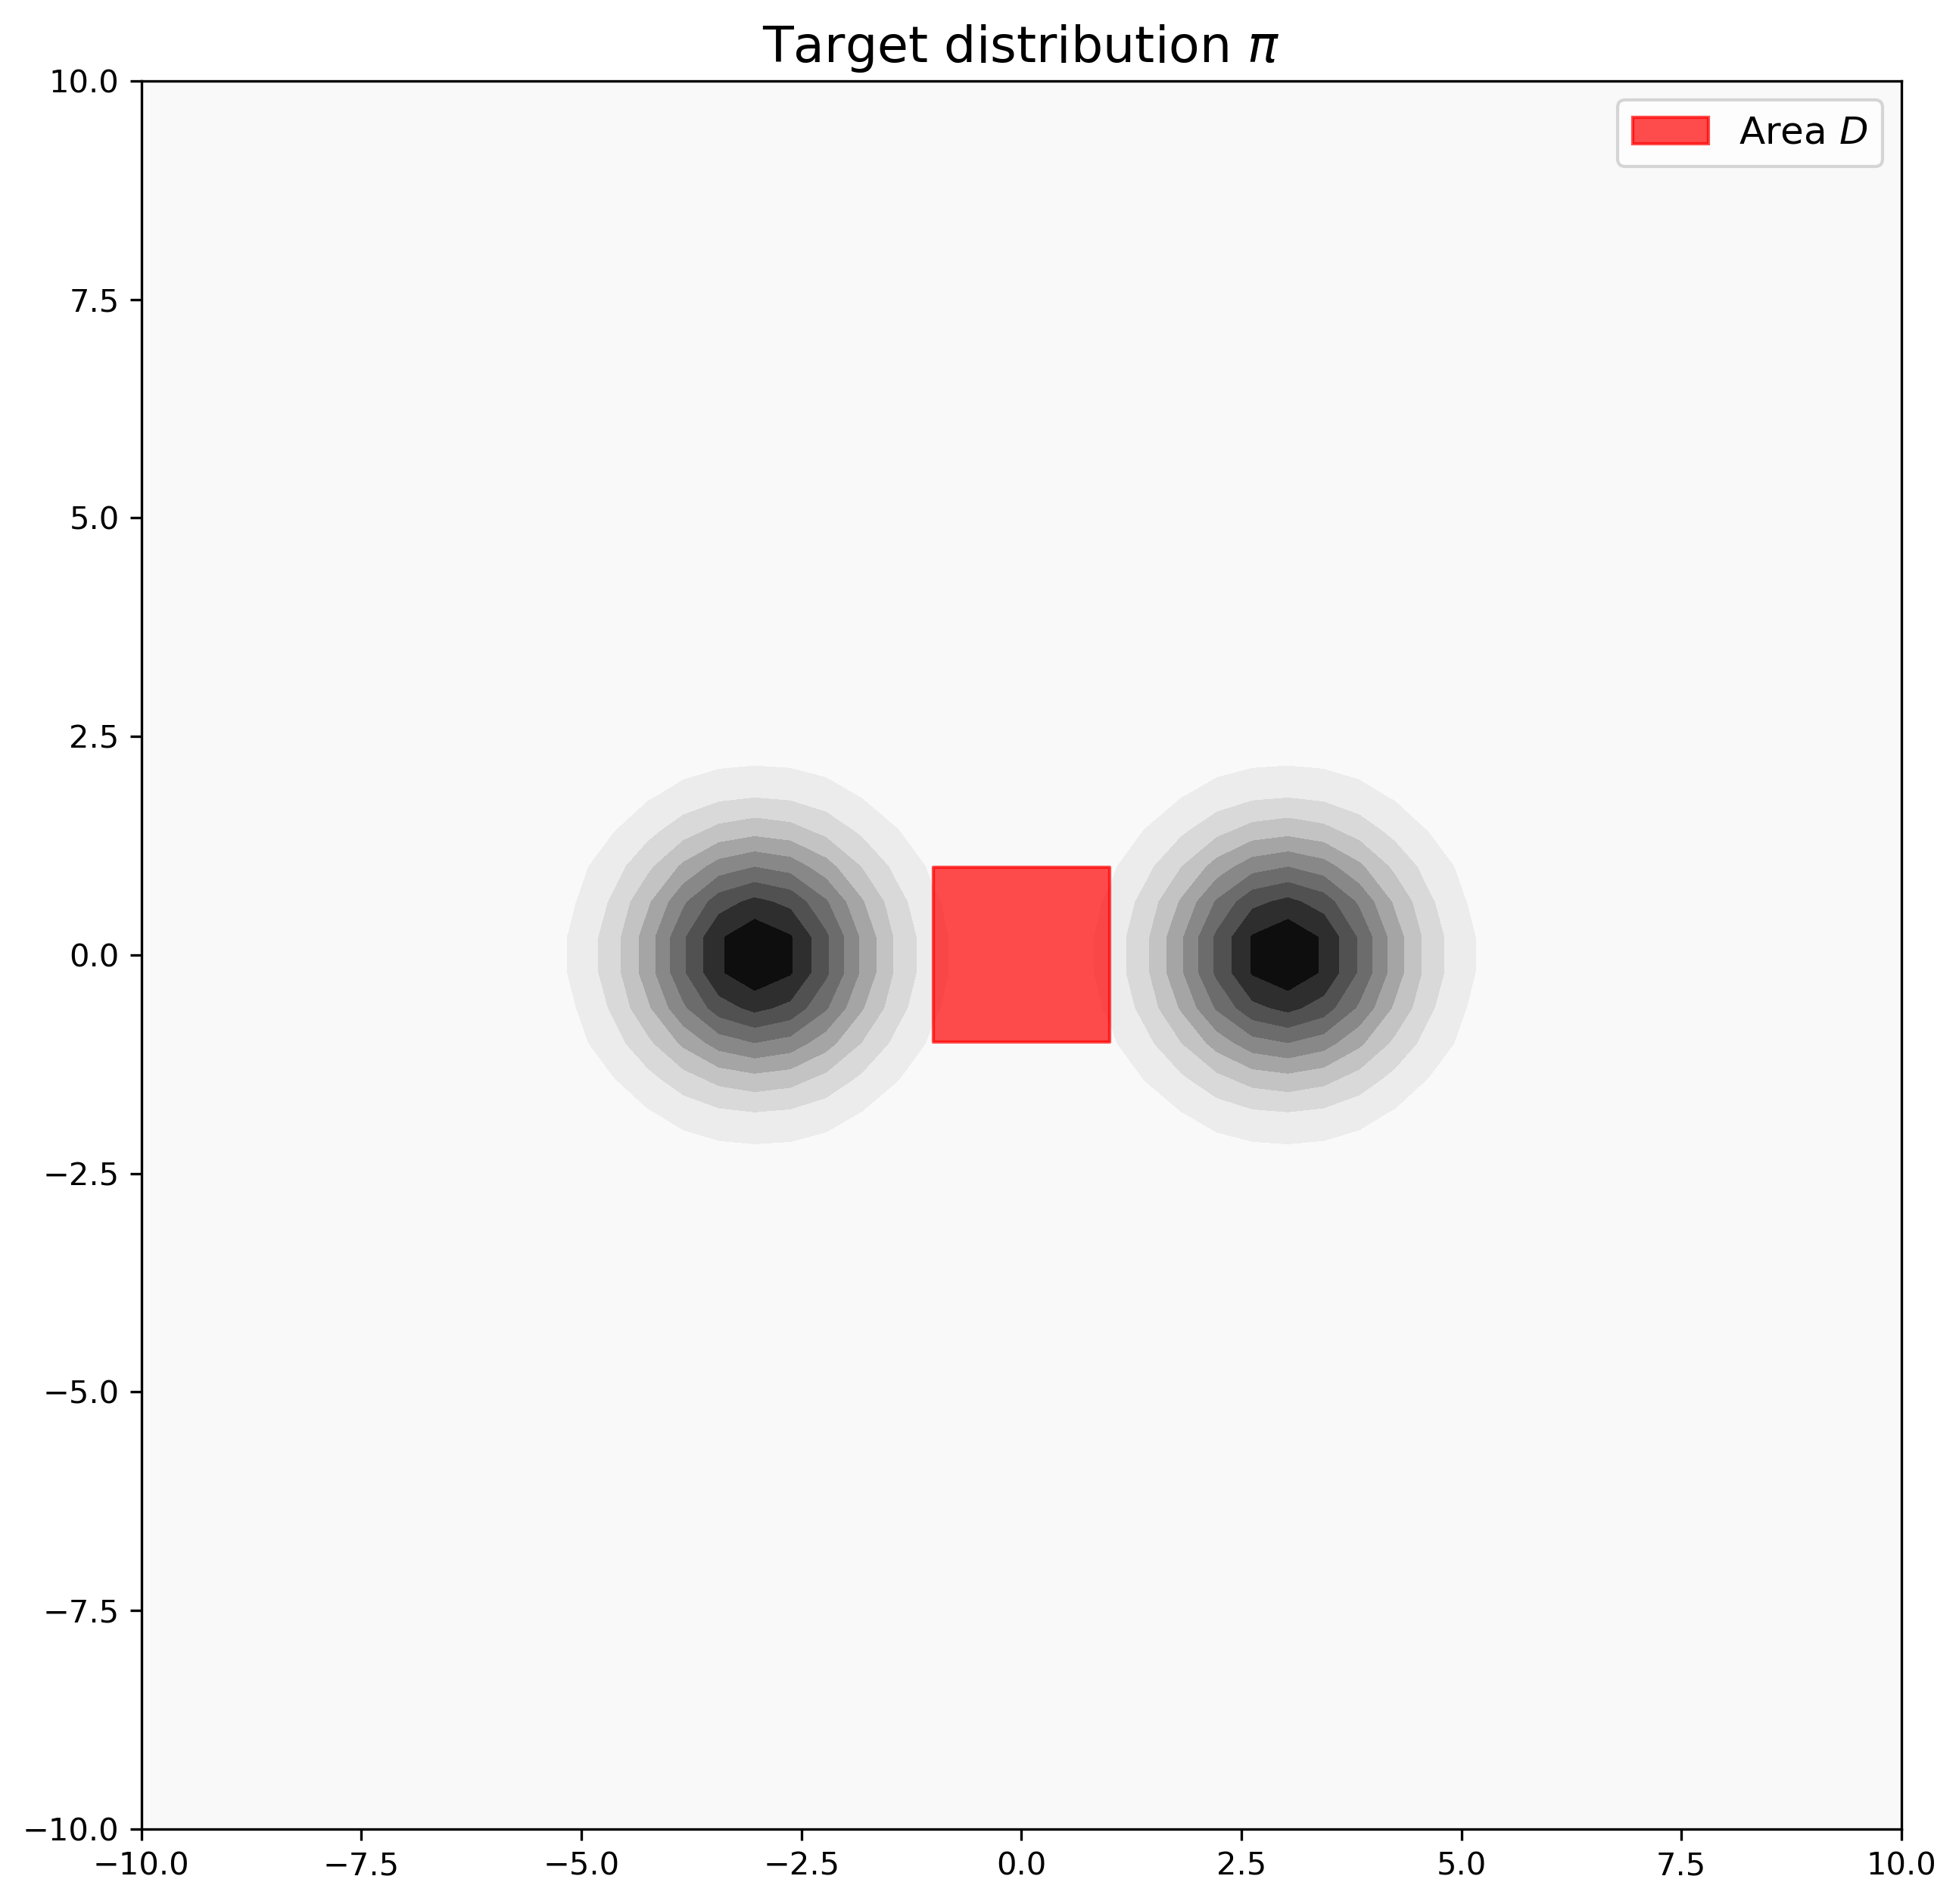

In [114]:
# make figure and ax
fig, ax = plt.subplots(1, 1, figsize=(10,10))
X, Y, Z_pi = fill_z(pi)
ax.contourf(X, Y, Z_pi, levels=10, cmap="Greys", zorder=-10)
ax.fill_between([-1, 1], [-1, -1], [1, 1], color='red', zorder=5, alpha=0.7, label="Area $D$")
ax.legend(loc="upper right", fontsize=12)
ax.set_title("Target distribution $\pi$", fontsize=16)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()
fig.savefig("/Users/carlosperello/Desktop/M3R/figs", bbox_inches='tight')


In [104]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


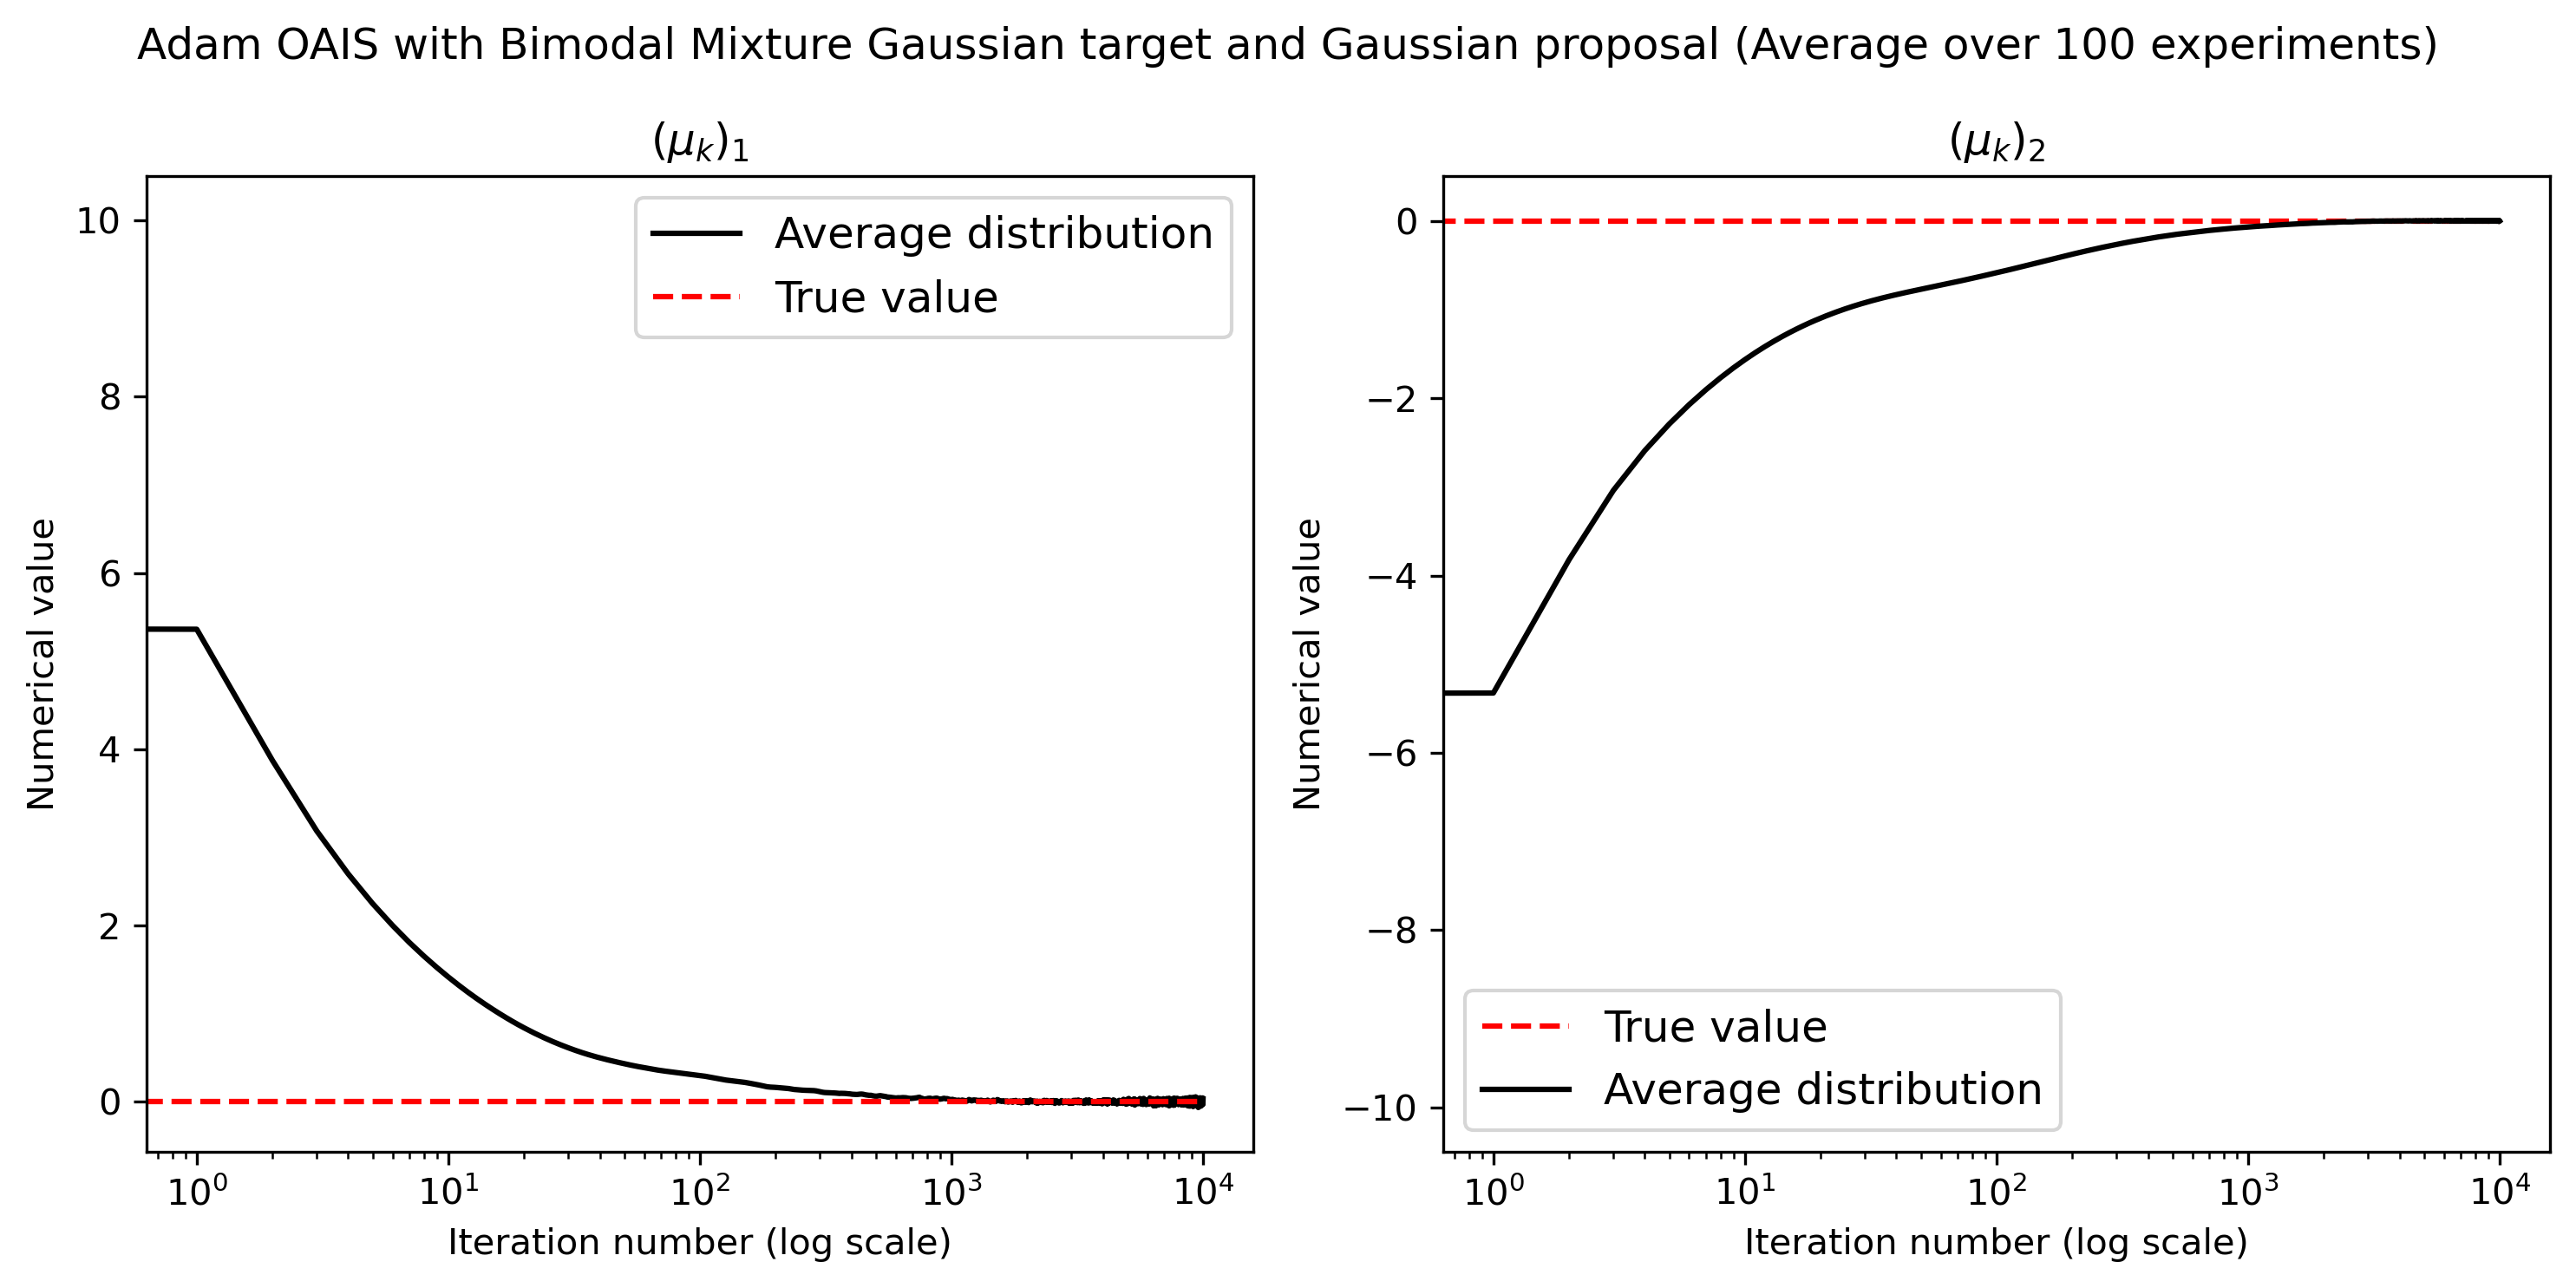

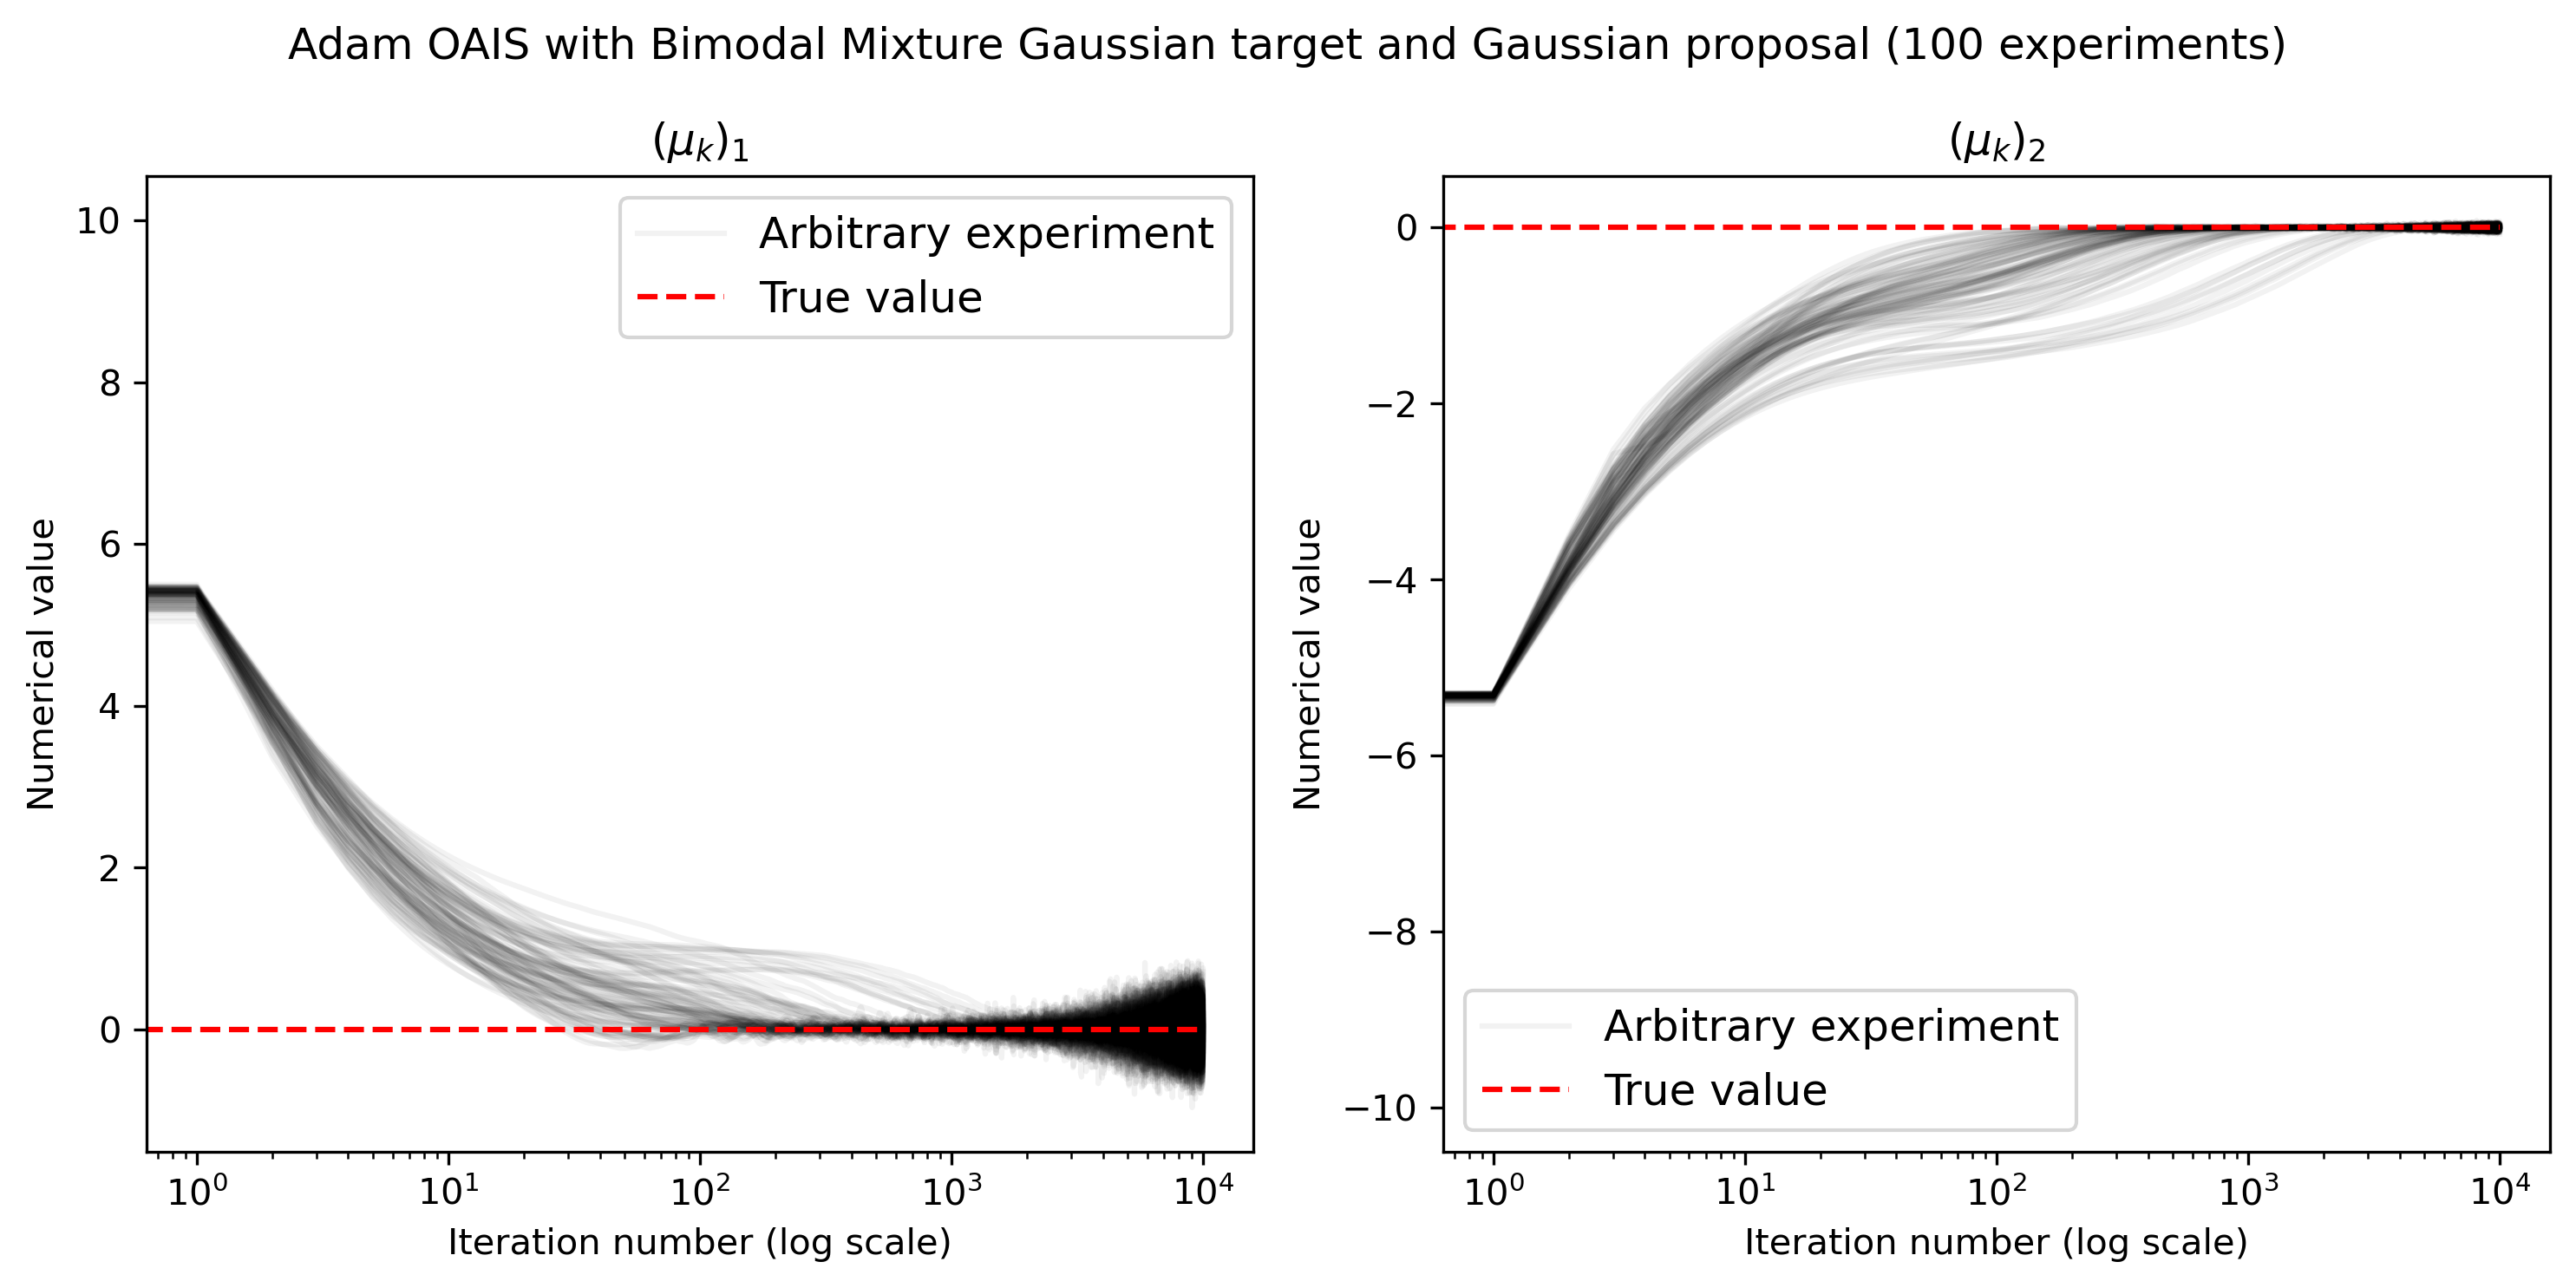

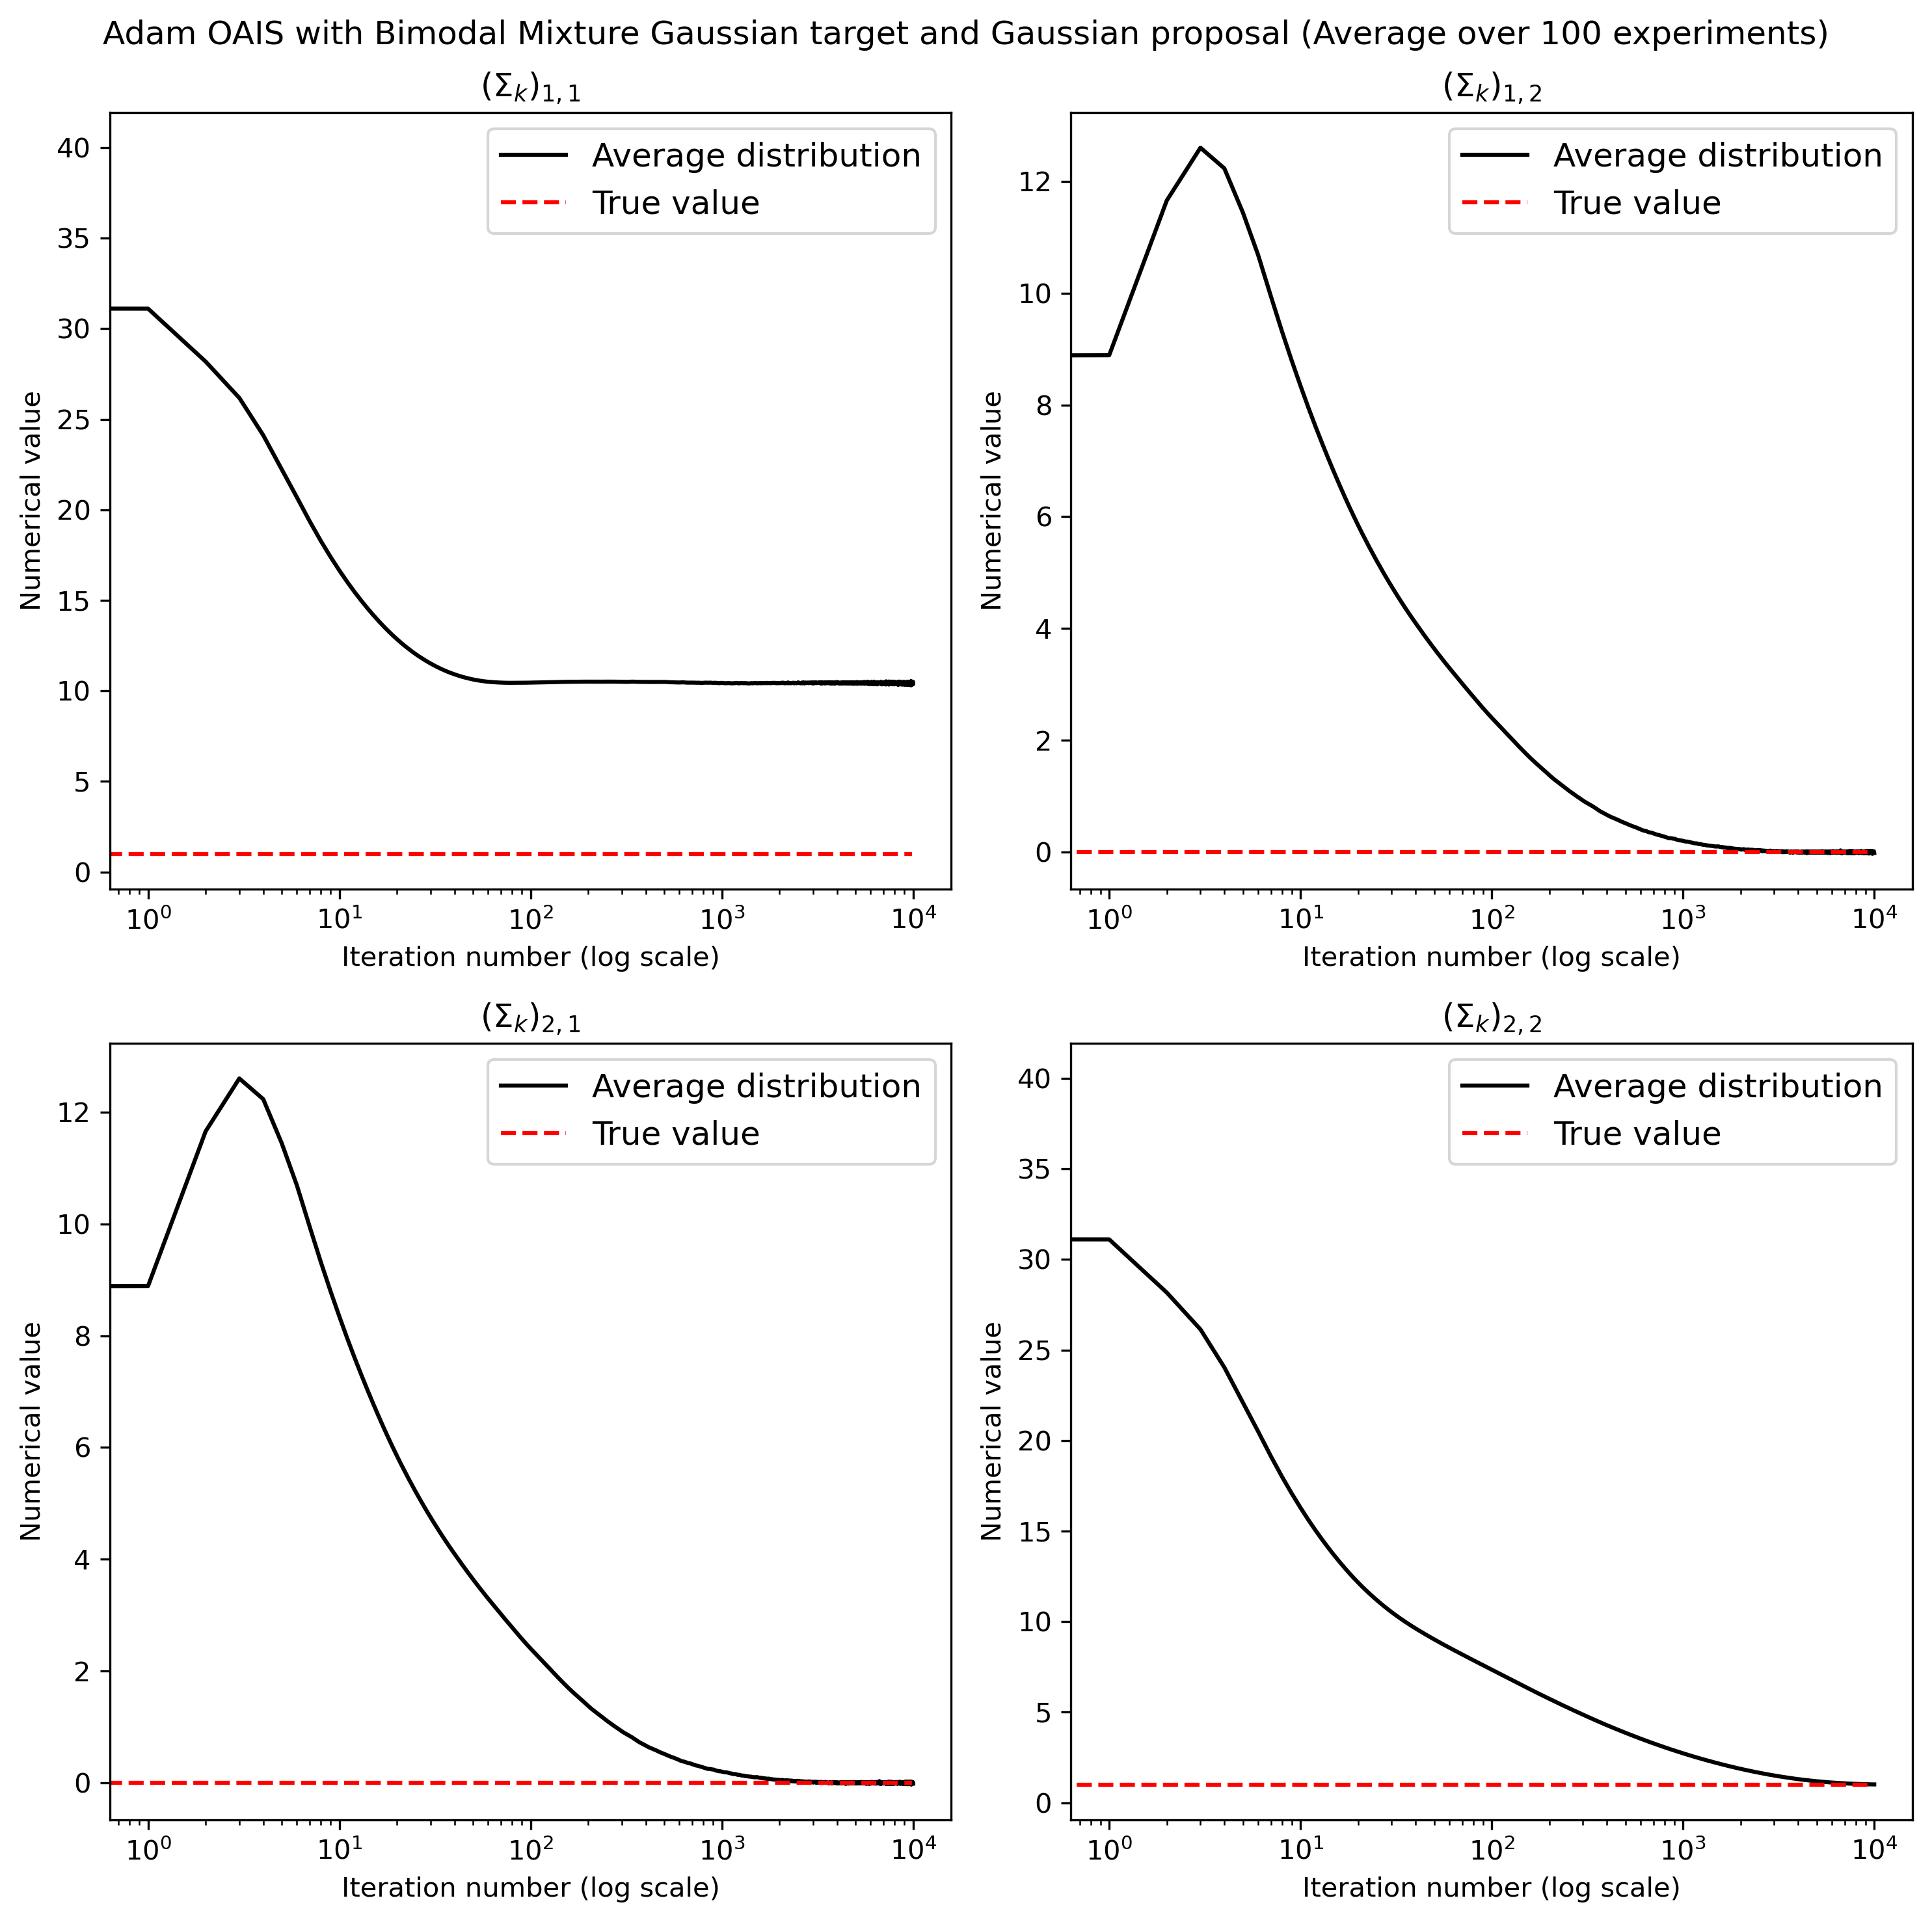

In [105]:
optimiser = "Adam"
for kind in ["mean", "cov"]:
    for average in [True, False]:
        if average:
            title = f"{optimiser} OAIS with Bimodal Mixture Gaussian target and Gaussian proposal (Average over {nexperiments} experiments)"
        else:
            title = f"{optimiser} OAIS with Bimodal Mixture Gaussian target and Gaussian proposal ({nexperiments} experiments)"
        plotter(distribution_array_Adam, pi, title=title, kind=kind, average=average, mix=True, alpha=0.05)
        plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/{optimiser}/{optimiser}_{kind}_avg_{average}.png")


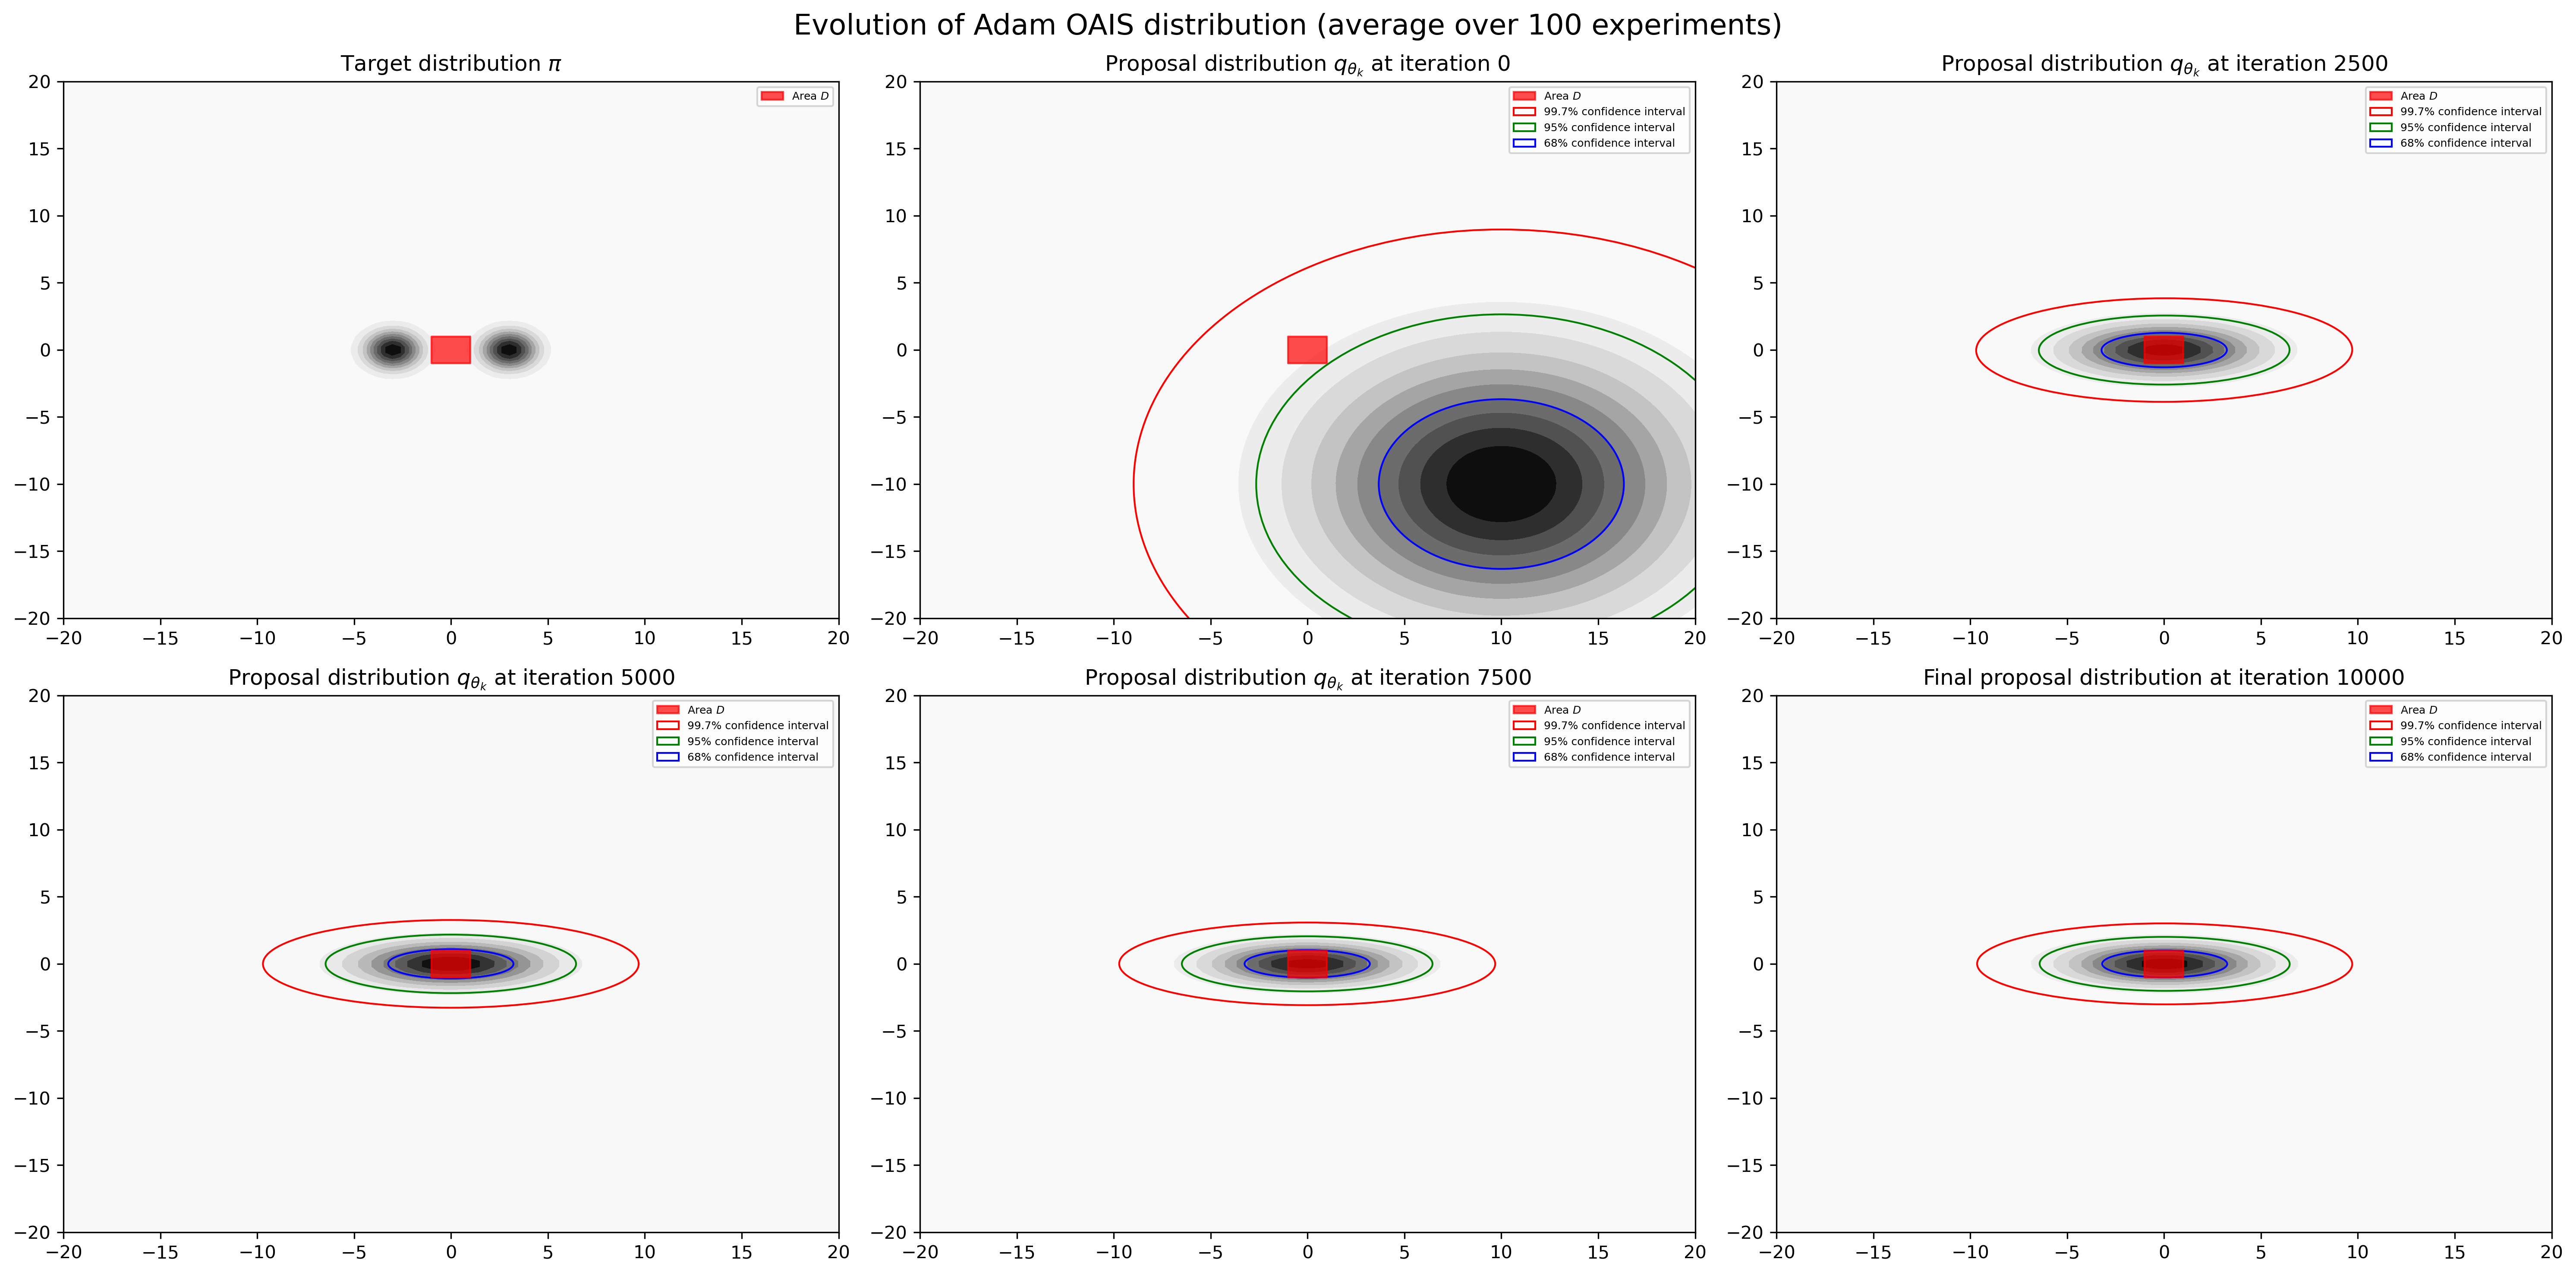

In [106]:
plot_contours(distribution_array_Adam, pi, title=f"Evolution of {optimiser} OAIS distribution (average over {nexperiments} experiments)", mix=True)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/{optimiser}/{optimiser}_contours.png")

In [107]:
GT = 0.015574

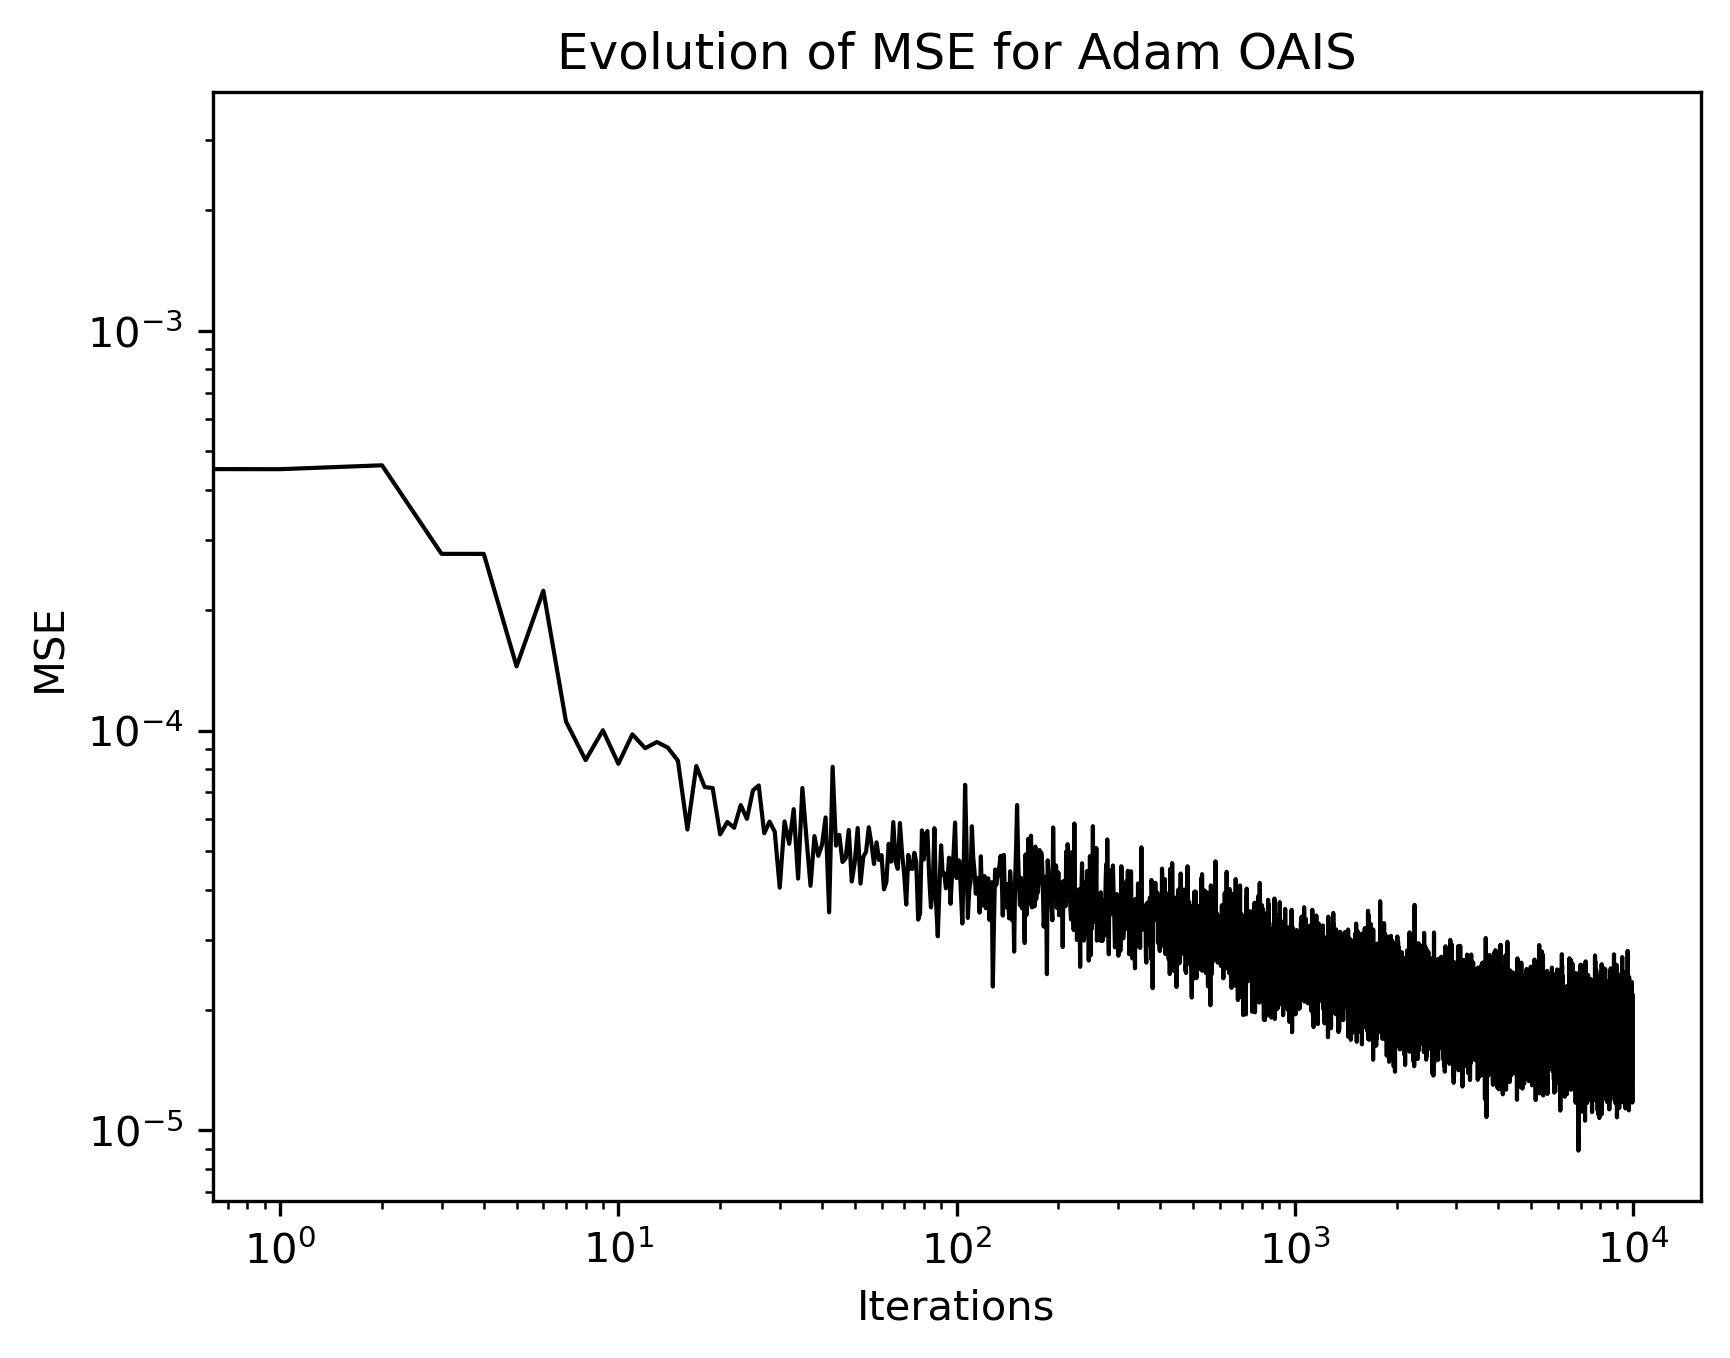

In [117]:
err_arr = (np.array(results_array_Adam) - GT)**2
plt.plot(np.mean(err_arr, axis=0), color="black", linewidth=1, label="Average MSE")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title(f"Evolution of MSE for {optimiser} OAIS")
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/{optimiser}/{optimiser}_MSE.png")
plt.show()

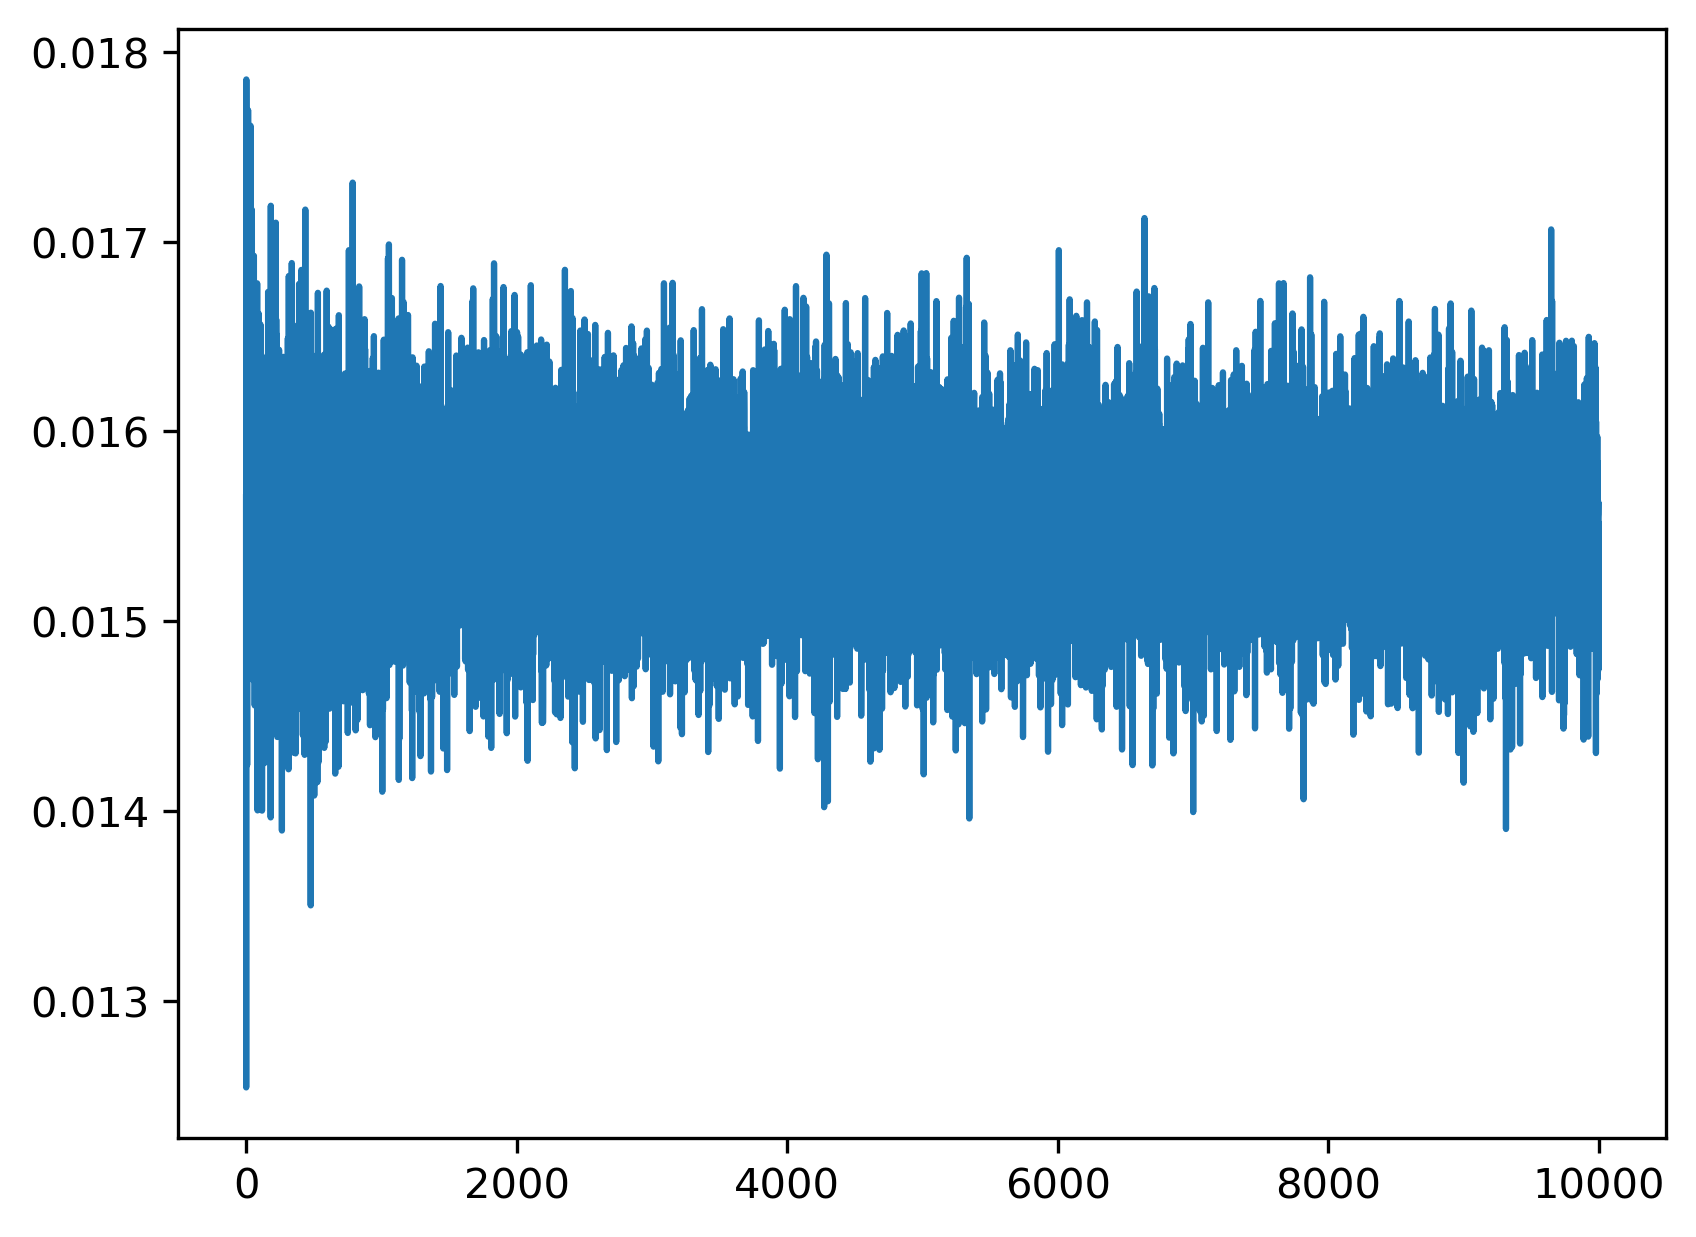

In [110]:
plt.plot(np.mean(results_array_Adam,axis=0))